In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

## Basic data exploration

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
corr_bmi_char = df['bmi'].corr(df['charges'])

In [6]:
corr_bmi_char

0.1983409688336289

<Axes: xlabel='bmi', ylabel='Count'>

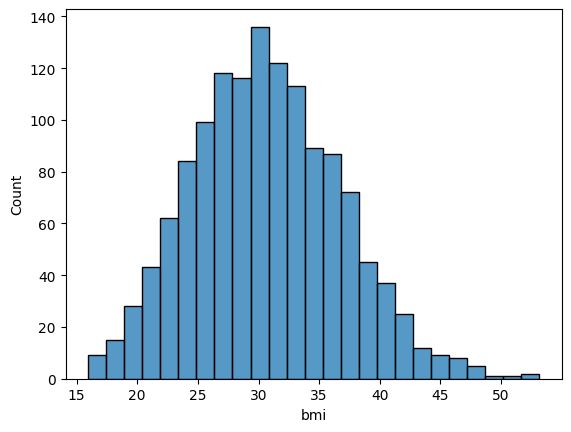

In [7]:
sns.histplot(x='bmi', data=df)

<Axes: ylabel='bmi'>

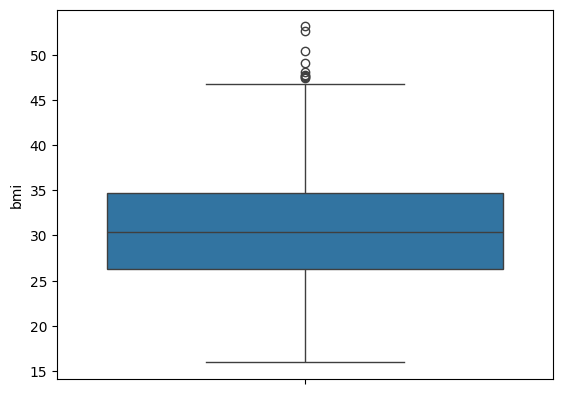

In [8]:
sns.boxplot(y='bmi', data=df)

<Axes: ylabel='charges'>

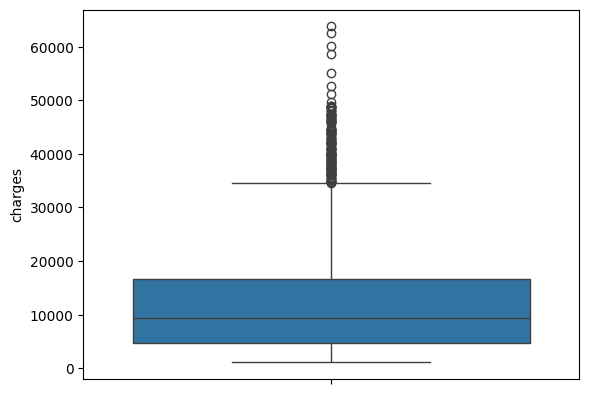

In [9]:
sns.boxplot(y='charges', data=df)

## Outliers elimination

In [10]:
z_scores = (df['charges'] - df['charges'].mean()) / df['charges'].std()
outliers = df[z_scores > 1.8]

In [11]:
df_cleaned = df[~df.index.isin(outliers.index)]


In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1205 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1205 non-null   int64  
 1   sex       1205 non-null   object 
 2   bmi       1205 non-null   float64
 3   children  1205 non-null   int64  
 4   smoker    1205 non-null   object 
 5   region    1205 non-null   object 
 6   charges   1205 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 75.3+ KB


In [13]:
df = df_cleaned

In [14]:
corr_age = df['age'].corr(df['charges'])
corr_age

0.4050853387739914

## Data Encoding

In [15]:
df['smoker_int'] = df['smoker'].map({'yes':1, 'no':0})

In [16]:
corr_smoke = df['smoker_int'].corr(df['charges'])
corr_smoke

0.6195996407598743

In [17]:
df['gender_int'] = df['sex'].map({'male':1, 'female':0})

In [18]:
corr_gender = df['gender_int'].corr(df['charges'])
corr_gender

-0.012245456932933349

In [19]:
corr_child = df['children'].corr(df['charges'])
corr_child

0.06870437449069702

In [20]:
df.pop('region')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1205, dtype: object

In [21]:
df.pop('smoker')

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1205, dtype: object

In [22]:
df.pop('sex')

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1205, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1205 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1205 non-null   int64  
 1   bmi         1205 non-null   float64
 2   children    1205 non-null   int64  
 3   charges     1205 non-null   float64
 4   smoker_int  1205 non-null   int64  
 5   gender_int  1205 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 65.9 KB


# Test train Split 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X = df.drop('charges', axis=1)
y = df['charges']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.41, random_state=500)

## Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn import metrics

In [56]:
model = DecisionTreeRegressor(max_depth=3)

In [57]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [58]:
y_pred = model.predict(X_test)

In [59]:
y_test.shape

(495,)

In [60]:
y_pred.shape

(495,)

# Decision tree Final Prediction

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2468.412749004542
MSE: 16768932.409184353
RMSE: 4094.9886946344986


In [62]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['bmi', 'children', 'charges', 'smoker_int', 'gender_int']

In [63]:
import graphviz

In [64]:
from sklearn.tree import plot_tree

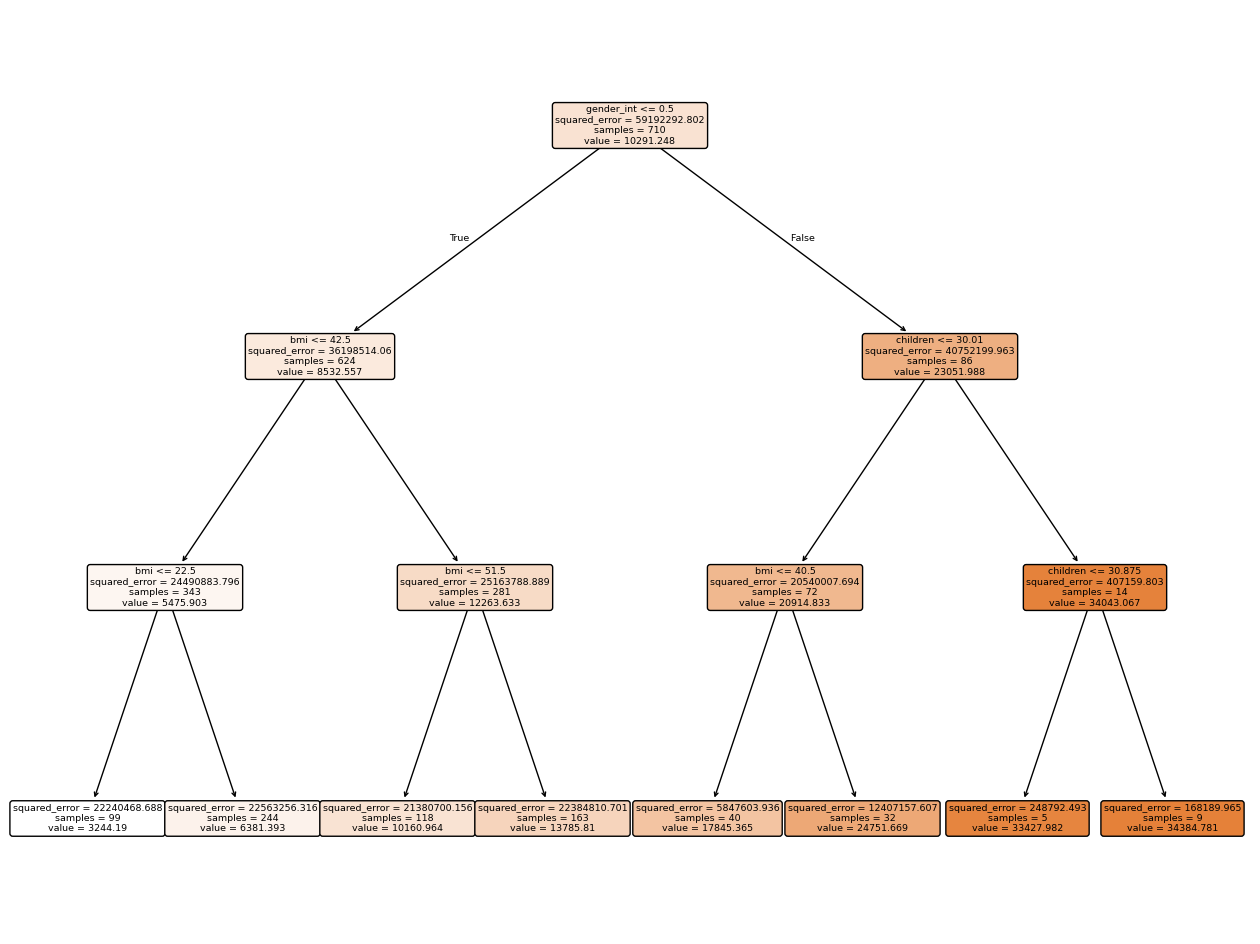

In [65]:
plt.figure(figsize=(16,12))
plot_tree(model, filled=True, feature_names=['bmi', 'children', 'smoker_int', 'gender_int'], class_names=['charges'], rounded=True)
plt.show()

# Grid Search

In [41]:
max_depths = [1,2,3,4,5,6]
rmse_scores = []


In [42]:
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    rmse_scores.append(rmse)

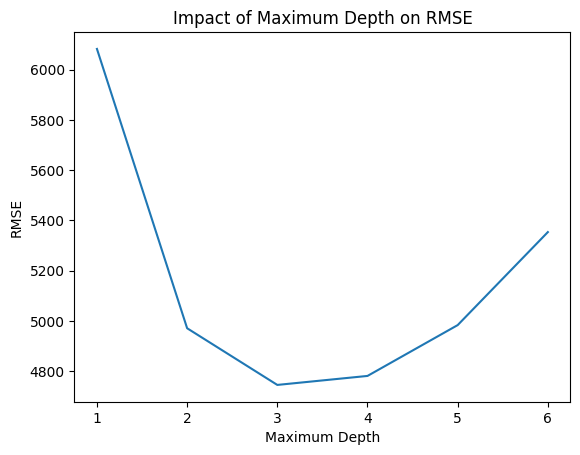

In [43]:
plt.plot(max_depths, rmse_scores)
plt.xlabel("Maximum Depth")
plt.ylabel("RMSE")
plt.title("Impact of Maximum Depth on RMSE")
plt.show()

In [44]:
param_grid = {
    'max_depth': [3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
    
}

In [45]:
r2 = DecisionTreeRegressor()

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid_search = GridSearchCV(estimator=r2, param_grid=param_grid, cv=5)

In [48]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [49]:
best_params = grid_search.best_params_
print("Best parameters:",best_params)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [50]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeRegressor(max_depth=3)

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=3, min_samples_split=2)

In [53]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=1000)

In [54]:
predictions = rfr.predict(X_test)

## Random Forest Final prediction

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2335.7173550977145
MSE: 15873904.326831399
RMSE: 3984.206862956716
